# SOMENTE O ITEM 1 É OBRIGATÓRIO PARA APRESENTAÇÃO!

# História das Olimpíadas - Parte 2
_(créditos ao prof. Rafael Moreira)_

Você recentemente trabalhou (ou está trabalhando) em uma análise de dados históricos dos jogos olímpicos utilizando o Pandas para auxiliá-lo.

Desde que você iniciou seus trabalhos nesse projeto, novas ferramentas bastante poderosas foram ensinadas! O seu papel agora será utilizar essas novas ferramentas para gerar algumas visualizações que tornarão certas informações muito mais claras.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

Você utilizará o mesmo dataset fornecido no projeto anterior. Não há problemas em reaproveitar códigos do projeto anterior para economizar tempo e focar seus esforços na geração dos gráficos.

Para começar, importe o Pandas e carregue o arquivo ```athlete_events.csv``` fornecido no projeto anterior.

In [1]:
'''Importando bibliotecas e criando DF do arquivo csv'''
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('athlete_events.csv')
df_atletas = pd.DataFrame(df)


## 1. O Brasil nas Olimpíadas

Vamos começar filtrando novamente os dados que iremos trabalhar. Crie um DataFrame contendo apenas informações sobre atletas **medalhistas** brasileiros.

In [2]:
'''1 Filtro = apenas atletas brasileiros
   2 Filtro = apenas medalhistas'''
df_br = df_atletas[df_atletas['NOC'] == 'BRA']
df_medalhas_br_total = df_br[df_br['Medal'].notna()]
df_medalhas_br_total.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold
1733,966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver


Vamos caracterizar fisicamente nossos medalhistas, verificando se há alguma correlação entre o desempenho em certos esportes e o tipo físico dos atletas. 

Gere um gráfico de barras contendo os diferentes esportes no eixo X e a altura dos atletas no eixo Y. Utilize barras lado-a-lado para separar atletas do sexo masculino e feminino.

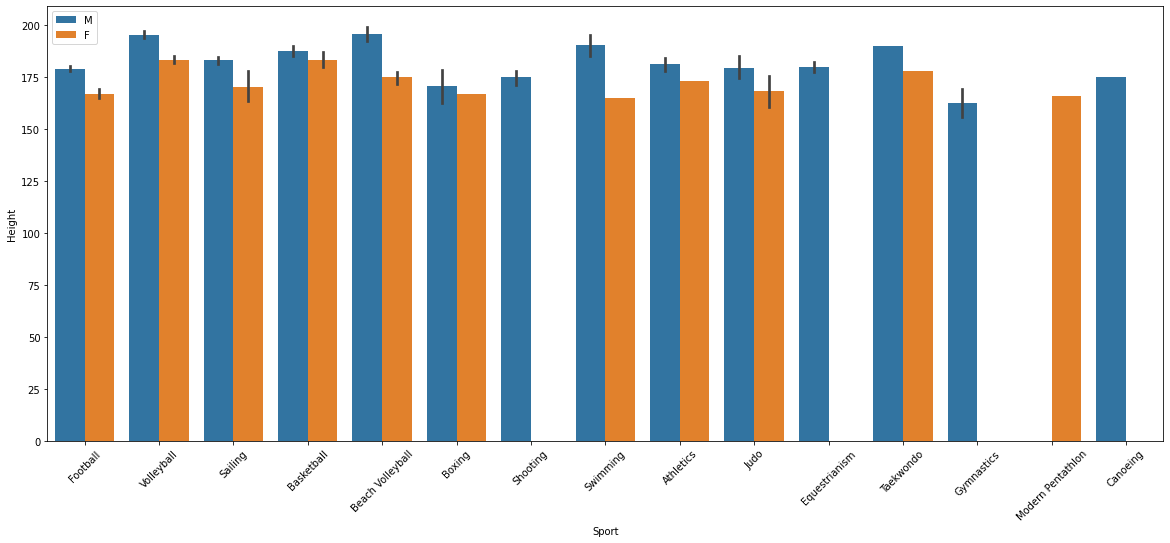

In [3]:
'''1 ajuste tamanho do grafico
   2 separação do DF dividindo os eixos entre esporte/altura e a 
   criação de coluna para diferenciar o gênero dos atletas
   3 ajuste da rotação dos nomes dos esportes por estetica e reposicionamento da legenda
'''
plt.figure(figsize=(20, 8))
medal_altura_peso_comparacao = sns.barplot(x='Sport', y='Height', data=df_medalhas_br_total, hue='Sex');
medal_altura_peso_comparacao.set_xticklabels(medal_altura_peso_comparacao.get_xticklabels(), rotation=45);
plt.legend(loc='upper left')
medal_altura_peso_comparacao;

Agora gere um gráfico semelhante ilustrando o peso dos atletas.

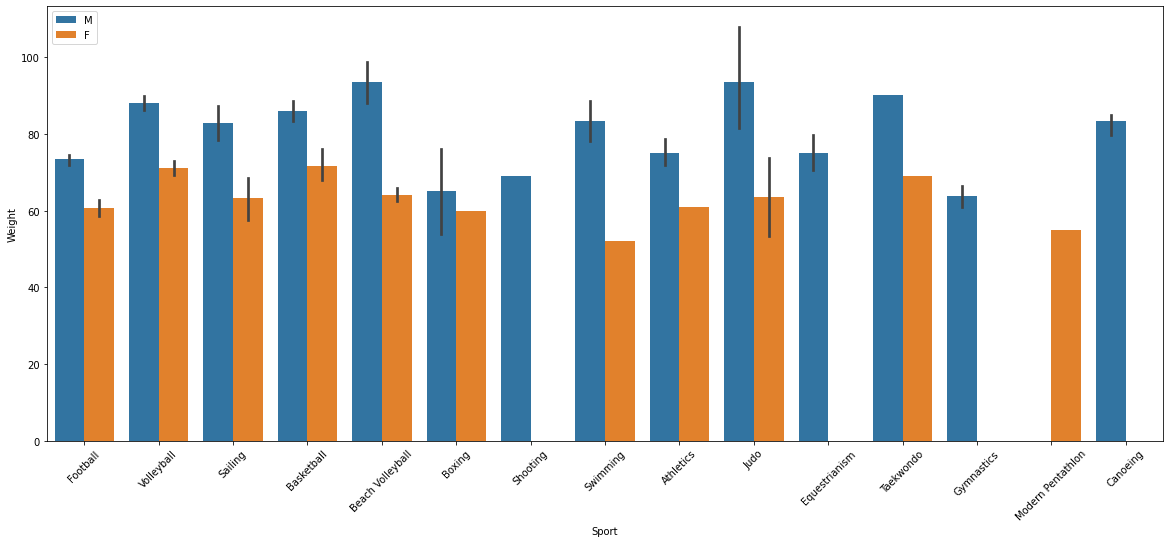

In [4]:
''' Unica modificação em relação ao anterior foi a troca da variável y de altura para peso'''
plt.figure(figsize=(20, 8))
medal_altura_peso_comparacao = sns.barplot(x='Sport', y='Weight', data=df_medalhas_br_total, hue='Sex');
medal_altura_peso_comparacao.set_xticklabels(medal_altura_peso_comparacao.get_xticklabels(), rotation=45);
plt.legend(loc='upper left')
medal_altura_peso_comparacao;

Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.

Encontre os maiores medalhistas brasileiros em **total de medalhas**. Em seguida, faça um gráfico de barras empilhadas. No eixo X coloque o nome dos atletas, e no eixo Y coloque o número de medalhas. Utilize as barras empilhadas para mostrar, respectivamente, as medalhas de bronze, prata e ouro de cada atleta.

In [5]:
'''criação de uma series a partir do DF, agrupando pelo nome e a as medalhas
   criação do DF gerado pela series anterior e renomeação da coluna medalhas para quantidade
   reset do indice para organização
'''
#todo meu codigo estava separado dessa forma,
#peguei uma dica com um colega que me ensinou a agrupar todas as funcoes numa linha só
s_contagem_medalhas = df_medalhas_br_total.groupby(by ='Name')['Medal'].value_counts()
df_medalhas_atleta = pd.DataFrame(s_contagem_medalhas)
df_medalhas_atleta.rename(columns={
    'Medal' : 'Quantity'
    }, inplace= True)
df_medalhas_atleta.reset_index(inplace=True)
quadro_medalhas_atletas = px.bar(df_medalhas_atleta, x='Name',
                                y= 'Quantity',
                                color= 'Medal',
                                labels = {'Medal': 'Medalhas', 'Quantity': 'Qtd de medalhas', 'Name': 'Nomes'},
                                color_discrete_sequence=['#667a8c', '#eff702', '#b06202'])
quadro_medalhas_atletas     

Agora gere o mesmo gráfico de barras empilhadas substituindo os nomes dos atletas pelo nome de todos os esportes onde o Brasil já ganhou medalhas.

**DICA:** tome muito cuidado nessa análise: cada **evento esportivo** rende 1 medalha. Por exemplo, quando a equipe de futebol vence, isso é considerado 1 medalha, mesmo tendo cerca de 20 atletas medalhistas na equipe. 

In [15]:
'''agrupando as colunas para não contar mais de uma vez o mesmo evento durante o ano'''
#como comentado anteriormente, juntei as funçoes numa linha e segui desse modo daqui pra frente.
df_medalhas_esporte = pd.DataFrame(df_medalhas_br_total.groupby(['Year', 'Medal', 'Event', 'Sport'])['Medal'].count()).rename(columns={'Medal':'Medal Quantity'})
df_medalhas_esporte = df_medalhas_esporte.reset_index()
'''agrupando para contar as medalhas e descartando o evento por causa do filtro anterior'''
df_medalhas_esporte = pd.DataFrame(df_medalhas_esporte.groupby(['Year', 'Medal', 'Sport'])['Medal'].count()).rename(columns={'Medal':'Medal Quantity'})
df_medalhas_esporte = df_medalhas_esporte.reset_index()
'''Criando grafico'''
fig_medalhas_esporte = px.bar(df_medalhas_esporte,
                              x = 'Sport',
                              color='Medal',
                              labels= {'count' : 'Total Medalhas', 'Medal' : 'Tipo Medalha', 'Sport': 'Esporte'},
                              color_discrete_sequence=['#b06202', '#eff702', '#667a8c'])
fig_medalhas_esporte

Mais um gráfico de barras empilhadas: agora mostre os **eventos esportivos** que renderam medalhas para o Brasil.

Lembrando: cada "categoria" dentro de um esporte é considerado um evento. Por exemplo, dentro de "atletismo", temos uma competição de 100m masculina, uma de 100m feminino, um revezamento 4 x 100m masculino, um revezamento 4 x 100m feminino, uma competição de 400m masculino, uma de 400m feminino, uma maratona masculina, uma maratona feminina, e assim sucessivamente.

In [20]:

'''contando as medalhas atraves de agrupamento de eventos.'''
df_medalhas_evento = pd.DataFrame(df_medalhas_br_total.groupby(['Year', 'Medal', 'Event'])['Medal'].count()).rename(columns={'Medal':'Medal Quantity'})
df_medalhas_evento = df_medalhas_evento.reset_index()
'''novo agrupamento para contar as medalhas e separa-las por tipo'''
df_medalhas_evento = pd.DataFrame(df_medalhas_evento.groupby(['Year', 'Medal', 'Event'])['Medal'].count()).rename(columns={'Medal':'Medal Quantity'})
df_medalhas_evento = df_medalhas_evento.reset_index()
'''Criando grafico'''
fig_medalhas_evento = px.bar(df_medalhas_evento,
       x='Event',
       color='Medal',
       labels={'count':'Total Medalhas', 'Medal':'Tipo Medalha', 'Event':'Eventos medalhistas'},
       color_discrete_sequence=['#b06202', '#eff702', '#667a8c'])
fig_medalhas_evento

Utilize um gráfico de distribuição (como um histograma, por exemplo) ilustrando a quantidade total de medalhas do Brasil por esporte.

In [29]:
df_medalhas_esporte.sort_values(by='Sport', inplace=True)

fig_histograma_medalhas_esporte = px.histogram(df_medalhas_esporte,
                   x='Sport',
                   category_orders={"Medal": ["Bronze", "Silver", "Gold"]},
                   color='Medal',
                   color_discrete_sequence=['#b06202', '#667a8c', '#eff702'])
fig_histograma_medalhas_esporte

Repita o procedimento acima, mas com medalhas de ouro.

In [34]:
'''Filtrando medalhas de ouro'''
df_medalhas_ouro = df_medalhas_esporte[df_medalhas_esporte['Medal']=='Gold']

fig_histograma_medalhas_ouro = px.histogram(df_medalhas_ouro,
                   x='Sport',
                   color_discrete_sequence=['#eff702'])

fig_histograma_medalhas_ouro.update_layout(yaxis_title='Total de Medalhas',
                  xaxis_title='Esporte')

fig_histograma_medalhas_ouro

Agora faça um gráfico de setores (pizza) mostrando a distribuição de medalhas de ouro do Brasil por esporte.

In [40]:
'''obtendo o total de ouro e agrupando por esporte + contagem'''
total_ouro_esporte = df_medalhas_ouro.groupby(['Sport'])['Sport'].count().values

'''separando apenas esportes com ouro atraves dos nomes dos esportes.'''
sports_names = df_medalhas_ouro['Sport'].unique()


graf_pizza_ouro_esporte = px.pie(values= total_ouro_esporte, names=sports_names,
       title='Medalhas de ouro / esporte (%)',
       color_discrete_sequence=px.colors.sequential.Turbo,
       hole=0.2)
graf_pizza_ouro_esporte

Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras. Crie um gráfico de linhas contendo 3 linhas: ouro, prata e bronze. Coloque no eixo X a edição da olimpíada (em ordem cronológica) e no eixo Y o total de medalhas de cada tipo.

In [42]:

'''Copiando DF anterior + reset de indice'''
df_medalhas_ano = df_medalhas_esporte.copy().reset_index(drop=True)

'''Realizando agrupamento por ano e medalha, e soma para obter qtd total''' 
df_medalhas_ano = pd.DataFrame(df_medalhas_ano.groupby(['Year', 'Medal']).sum()).reset_index()

fig_medalhas_tempo = px.line(df_medalhas_ano,
              x='Year',
              y='Medal Quantity',
              title='Grafico Temporal',
              color='Medal',
              symbol='Medal',
              color_discrete_sequence=px.colors.sequential.Turbo,
              category_orders={"Medal": ["Bronze", "Silver", "Gold"]})

fig_medalhas_tempo.update_traces(line_dash='dot')
fig_medalhas_tempo

## 2. O mundo nos jogos de verão

Filtre o DataFrame original para conter apenas informações sobre os **medalhistas** de todos os países **nos jogos de verão**.



Utilizando subplots, crie 2 boxplots ilustrando a quantidade de medalhas por atleta. Em um deles, considere todos os atletas. No segundo, experimente remover os *outliers*.

Descubra o total de medalhas de ouro de cada país (lembrando-se da restrição dos eventos esportivos, para não contabilizar múltiplas medalhas em esportes de equipe!).

Agora pegue os 10 países com mais medalhas e crie uma categoria "Outros" para o restante dos países. Exiba um gráfico de pizza mostrando a distribuição de medalhas de ouro entre essas 11 "equipes".

Repita o procedimento acima, mas mostrando o total de medalhas ao invés de apenas medalhas de ouro.

Crie um gráfico de barras empilhadas, com cada país das categorias acima no eixo X, total de medalhas no eixo Y, e barras empilhadas representando as medalhas de ouro, prata e bronze de cada país.

Crie um gráfico de distribuição (por exemplo, um histograma) mostrando a quantidade total de medalhas por país.

**Desafio bônus:** Crie uma visualização da quantidade de medalhas de ouro e outra para quantidade total de medalhas por país, ambas utilizando mapas. Utilize o tipo de mapa que achar mais adequado.

## 3. Brasil vs Mundo

Faça um gráfico de barras comparando os maiores medalhistas brasileiros com os maiores medalhistas do mundo em suas respectivas categorias.

Represente o esporte no eixo X, a quantidade de medalhas no eixo Y, coloque barras lado-a-lado representando os diferentes atletas de uma mesma modalidade e empilhe as medalhas de ouro, prata e bronze de cada atleta.

Repita o procedimento acima, mas ao invés de atletas, considere o(s) esporte(s) onde o Brasil mais possui medalha comparando-os com o país com maior quantidade de medalhas naquele esporte.

Para finalizar, repita os gráficos que você gerou com os 10 países com mais medalhas, mas remova o Brasil da categoria "Outros" e mostre-o também no gráfico.